## Project Spotify AWS

### Content
- [Spotify API](#1)
- [Data Cleaning](#dc)
- [EDA](#eda)


#### Informacion Adicional: 
    
https://www.linkedin.com/pulse/mood-based-music-recommendation-python-spotify-api-burak-%C3%B6zt%C3%BCrk/?trk=public_profile_article_view

https://towardsdatascience.com/build-your-first-mood-based-music-recommendation-system-in-python-26a427308d96



mas complejo pero muy muy bueno ==> incluye modelo de NN para predecir 
https://github.com/kvsingh/music-mood-classification/blob/main/get-playlists-data.py


Enviar mail de reporte sobre el artista y recomendacion de su musica 

https://medium.com/mlearning-ai/spotify-api-project-using-python-5fbcab921f5e


https://towardsdatascience.com/extracting-song-data-from-the-spotify-api-using-python-b1e79388d50



https://towardsdatascience.com/build-your-first-mood-based-music-recommendation-system-in-python-26a427308d96


Music recomender going from a sad mood to a happy mood


https://www.mdpi.com/2076-3417/12/21/11209

https://github.com/MaxHilsdorf/mood-based-music-recommendation-system/blob/main/recommendation_system.ipynb


https://www.researchgate.net/figure/Emotional-classification-of-music-by-energy-and-valence-parameters-with-exemplary-songs_fig2_334084112

**Importamos las librerias a usar** 

In [1]:
import spotipy 
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 
import plotly.express as px
from sklearn import preprocessing

#importamos el archivo .py que hicimos para scrapear spotify con la API Spotipy 
import functions_spotify
from functions_spotify import get_track_data

### Spotify API <a id='1'></a>

In [2]:
CLIENT_ID= 'b39a670615f14cfca30a8178b3bc3ed6'

CLIENT_SECRET= '436db3dc10fd410e98e90625c79226ac'

In [3]:
auth_manager= SpotifyClientCredentials(client_id= CLIENT_ID, client_secret= CLIENT_SECRET)
sp= spotipy.Spotify(auth_manager= auth_manager)

In [4]:
df= get_track_data(100, CLIENT_ID, CLIENT_SECRET)

360880
starting strack  1 |
finished track details I
starting track features
finished track features II
218018
starting strack  2 ||
finished track details I
starting track features
finished track features II
285506
starting strack  3 |||
finished track details I
starting track features
finished track features II
209440
starting strack  4 ||||
finished track details I
starting track features
finished track features II
216426
starting strack  5 |||||
finished track details I
starting track features
finished track features II
170786
starting strack  6 ||||||
finished track details I
starting track features
finished track features II
256160
starting strack  7 |||||||
finished track details I
starting track features
finished track features II
213933
starting strack  8 ||||||||
finished track details I
starting track features
finished track features II
196394
starting strack  9 |||||||||
finished track details I
starting track features
finished track features II
226306
starting strack  10 |

Guardamos los datos como csv

In [5]:
df.drop_duplicates(subset = "id", keep = "first", inplace = True)
df.to_csv("scraped_spotify_dataset.csv", index = False) 

In [9]:
df.head()

,id,genre,track_name,artist_name,valence,energy,danceability,key,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,popularity,audio
0,4VJgrWjrkodaGiq3xKz62z,acoustic,Sometimes (I Wish),City and Colour,0.135,0.467,0.523,5,-7.713,0.0281,0.311,0.00002,0.3400,129.953,360880,38,https://p.scdn.co/mp3-preview/4de99ea0091b373c...
1,2Gb3up6s243JSVuRRjwQoF,acoustic,Nothing On You / Hey Soul Sister feat. Sam Tsui,Ahmir,0.369,0.698,0.721,10,-4.469,0.0328,0.193,0.00000,0.0713,106.020,218018,0,None
2,0WZ0sCWOXINYNpBtmfyd6C,acoustic,Everything,Ben Howard,0.341,0.261,0.525,3,-16.390,0.0521,0.722,0.00126,0.0497,141.805,285506,0,None
3,2lFTzUnuGaWlWHJQokjRyb,acoustic,Blue Jeans,Lana Del Rey,0.488,0.837,0.558,3,-4.405,0.0633,0.418,0.00000,0.0821,117.963,209440,65,None
4,1nuqzCMgj2lxZCmpdCmIGv,acoustic,A Lack of Color,Various Artists,0.357,0.337,0.635,3,-12.125,0.0288,0.805,0.00256,0.1420,135.826,216426,35,https://p.scdn.co/mp3-preview/a205541452cdc7be...


In [7]:
df.shape

(11133, 17)

In [10]:
df.columns

Index(['id', 'genre', 'track_name', 'artist_name', 'valence', 'energy',
       'danceability', 'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'popularity',
       'audio'],
      dtype='object')

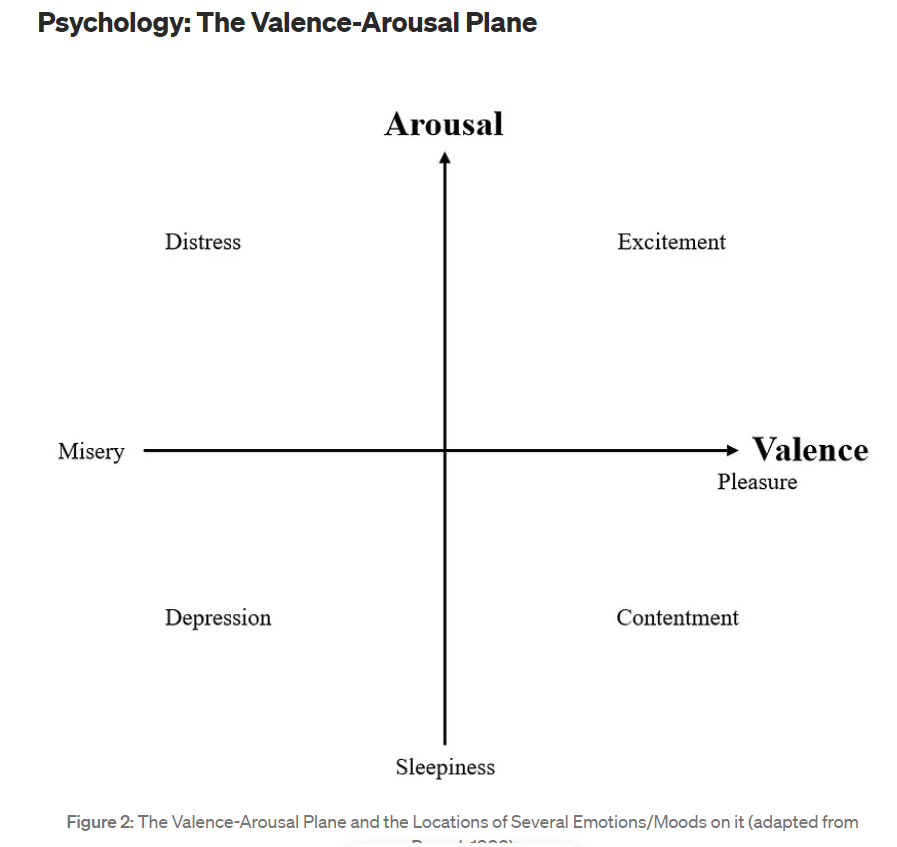

In [23]:
from IPython.display import Image
Image(filename='Captura de pantalla 2023-04-19 104350.png') 

### EDA <a id='eda'></a>

In [12]:
df= pd.read_csv('data/scraped_spotify_dataset.csv')

In [13]:
selected_values= ['latino', 'indie']
df[df[df.columns[1]].isin(selected_values)]

,id,genre,track_name,artist_name,valence,energy,danceability,key,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,popularity,audio
5455,2sbtixigDCbjXBTMRSEECS,indie,Green Light - Chromeo Remix,Lorde,0.866,0.880,0.794,2,-4.734,0.0370,0.041400,0.000002,0.0958,121.009,247933,51,NaN
5456,34LohAliZ2QKydqVJcFpwV,indie,Sleep Apnea,Beach Fossils,0.491,0.685,0.553,2,-10.624,0.0266,0.145000,0.859000,0.1380,79.998,146293,0,NaN
5457,3eS1455bVYxlkk1a2GVTaQ,indie,You Should All Be Murdered,Another Sunny Day,0.947,0.905,0.417,5,-8.986,0.0315,0.000113,0.856000,0.2770,159.350,278440,42,https://p.scdn.co/mp3-preview/20adc206c0386e45...
5458,4ZOv9mx6Lz7RRaBFi5UNaE,indie,Aquarium,Nosaj Thing,0.271,0.655,0.635,0,-9.521,0.0484,0.150000,0.553000,0.1290,91.026,184000,50,https://p.scdn.co/mp3-preview/cbe2b3871f7061c7...
5459,7kgMtZHgem1PlJhuP7vbur,indie,Rivers And Roads,The Head And The Heart,0.164,0.199,0.487,0,-8.931,0.0354,0.726000,0.000039,0.0755,137.873,284000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728,5NOtC9vnvCuEy6IaNflffX,latino,Adentro,Calle 13,0.518,0.808,0.333,4,-6.476,0.2600,0.452000,0.000000,0.4270,82.150,292920,57,https://p.scdn.co/mp3-preview/b30f503b64d5bbcc...
6729,6RlAZ8QY4LcA4DxUUIiwmn,latino,Limbo,Daddy Yankee,0.917,0.875,0.806,7,-3.817,0.0880,0.083800,0.001920,0.0650,125.063,224693,49,NaN
6730,5YiYgzELh2M8I3LyLOMnNz,latino,Guaya Guaya,Don Omar,0.687,0.872,0.689,7,-2.116,0.2430,0.006610,0.000196,0.1360,183.942,194013,50,NaN
6731,7F9x0IsqvqlygaNseNE8Zx,latino,Candela,Buena Vista Social Club,0.814,0.619,0.525,9,-12.322,0.0354,0.719000,0.000168,0.2890,101.045,327866,0,NaN


In [14]:
df.head()

,id,genre,track_name,artist_name,valence,energy,danceability,key,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,popularity,audio
0,4VJgrWjrkodaGiq3xKz62z,acoustic,Sometimes (I Wish),City and Colour,0.135,0.467,0.523,5,-7.713,0.0281,0.311,0.00002,0.3400,129.953,360880,38,https://p.scdn.co/mp3-preview/4de99ea0091b373c...
1,2Gb3up6s243JSVuRRjwQoF,acoustic,Nothing On You / Hey Soul Sister feat. Sam Tsui,Ahmir,0.369,0.698,0.721,10,-4.469,0.0328,0.193,0.00000,0.0713,106.020,218018,0,NaN
2,0WZ0sCWOXINYNpBtmfyd6C,acoustic,Everything,Ben Howard,0.341,0.261,0.525,3,-16.390,0.0521,0.722,0.00126,0.0497,141.805,285506,0,NaN
3,2lFTzUnuGaWlWHJQokjRyb,acoustic,Blue Jeans,Lana Del Rey,0.488,0.837,0.558,3,-4.405,0.0633,0.418,0.00000,0.0821,117.963,209440,65,NaN
4,1nuqzCMgj2lxZCmpdCmIGv,acoustic,A Lack of Color,Various Artists,0.357,0.337,0.635,3,-12.125,0.0288,0.805,0.00256,0.1420,135.826,216426,35,https://p.scdn.co/mp3-preview/a205541452cdc7be...


In [15]:
df.describe()

,valence,energy,danceability,key,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,popularity
count,11133.000000,11133.000000,11133.000000,11133.000000,11133.000000,11133.000000,11133.000000,11133.000000,11133.000000,11133.000000,1.113300e+04,11133.000000
mean,0.493475,0.662030,0.554524,5.313572,-8.239442,0.083413,0.284515,0.178297,0.203898,122.752607,2.516342e+05,18.591395
std,0.269066,0.251231,0.176547,3.558306,4.809345,0.108558,0.328986,0.318212,0.177823,29.015047,1.190180e+05,23.739355
min,0.000000,0.000000,0.000000,0.000000,-45.393000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.269000,0.494000,0.441000,2.000000,-10.164000,0.036200,0.008400,0.000000,0.094000,100.525000,1.956660e+05,0.000000
50%,0.492000,0.715000,0.568000,5.000000,-6.999000,0.048700,0.115000,0.000246,0.130000,123.799000,2.345060e+05,2.000000
75%,0.717000,0.874000,0.685000,8.000000,-4.981000,0.084000,0.541000,0.164000,0.266000,139.966000,2.858400e+05,36.000000
max,0.998000,1.000000,0.965000,11.000000,2.127000,0.962000,0.996000,0.994000,0.994000,218.967000,4.719013e+06,90.000000


#### Top 10 Most Popular Songs

In [16]:
df[['track_name', 'artist_name','genre', 'popularity', 'valence', 'energy']].sort_values(by= 'popularity', ascending=False).head(10)

,track_name,artist_name,genre,popularity,valence,energy
4483,Yellow,Coldplay,happy,90,0.285,0.661
8017,Night Changes,One Direction,pop,89,0.370,0.520
1658,When I Was Your Man,Bruno Mars,chill,89,0.387,0.280
4481,Viva La Vida,Coldplay,happy,88,0.417,0.617
8012,I'm Not The Only One,Sam Smith,pop,87,0.493,0.485
10551,Take on Me,a-ha,synth-pop,87,0.876,0.902
8020,Counting Stars,OneRepublic,pop,86,0.477,0.705
1574,Umbrella,Rihanna,children,86,0.575,0.829
9046,Bound 2,Kanye West,road-trip,85,0.310,0.665
10886,Feel Good Inc.,Gorillaz,trip-hop,85,0.772,0.705


#### Psycology & Emotions
**Arousal - Energy Plane**

*Arousal referred to the energy level of the music,

In [17]:
top_100= df[['track_name', 'artist_name','genre', 'popularity', 'valence', 'energy']].sort_values(by= 'popularity', ascending=False).head(100)
fig = px.scatter(top_100,  x='valence', y="energy", color="genre", 
                 title="Valence Arousal Plane",
                 labels={"valence":"Valence"} # customize axis label
                )

fig.show()

In [18]:
fig = px.histogram(df, x="energy")
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df, x="valence")
fig.update_layout(bargap=0.2)
fig.show()

Vamos a hacer un data standarization asi tenemos valores entre -1 y 1. Con media 0 y desvio estandar de 1

In [19]:
energy_standard = preprocessing.scale(df.energy)
valence_standard= preprocessing.scale(df.valence)
df['energy_standard']= energy_standard
df['valence_standard']= valence_standard

df.rename(columns={'trakc_name': 'Track', 
                   'artist_name': 'Artist', 
                   'genre': 'Genre'}, inplace=True)

In [21]:
df.head()

,id,Genre,track_name,Artist,valence,energy,danceability,key,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,popularity,audio,energy_standard,valence_standard
4483,3AJwUDP919kvQ9QcozQPxg,happy,Yellow,Coldplay,0.285,0.661,0.429,11,-7.227,0.0281,0.00239,0.000121,0.2340,173.372,266773,90,https://p.scdn.co/mp3-preview/c0d9119dc69cae75...,-0.004099,-0.774843
8017,5O2P9iiztwhomNh8xkR9lJ,pop,Night Changes,One Direction,0.370,0.520,0.672,8,-7.747,0.0353,0.85900,0.000000,0.1150,120.001,226600,89,https://p.scdn.co/mp3-preview/359be833b46b250c...,-0.565362,-0.458921
1658,0nJW01T7XtvILxQgC5J7Wh,chill,When I Was Your Man,Bruno Mars,0.387,0.280,0.612,0,-8.648,0.0434,0.93200,0.000000,0.0880,72.795,213826,89,https://p.scdn.co/mp3-preview/159fc05584217baa...,-1.520702,-0.395737
4481,1mea3bSkSGXuIRvnydlB5b,happy,Viva La Vida,Coldplay,0.417,0.617,0.486,5,-7.115,0.0287,0.09540,0.000003,0.1090,138.015,242373,88,https://p.scdn.co/mp3-preview/fb9f4a9b08873267...,-0.179245,-0.284235
8012,7795WJLVKJoAyVoOtCWqXN,pop,I'm Not The Only One,Sam Smith,0.493,0.485,0.677,5,-5.795,0.0361,0.52900,0.000020,0.0766,82.001,239316,87,NaN,-0.704682,-0.001765


In [20]:
df.sort_values(by= 'popularity', ascending=False, inplace=True)
df.to_csv("scraped_spotify_dataset_new.csv", index = False) 

In [11]:
top_100= df[['track_name', 'artist_name','genre', 'popularity', 'valence_standard', 'energy_standard']].sort_values(by= 'popularity', ascending=False).head(100)
fig = px.scatter(top_100,  x='valence_standard', y="energy_standard", color='genre',
                 title="Music Psychology: Valence Arousal Plane",
                 labels={"valence_standard":"</b>Valence</b>", 
                         "energy_standard": '</b>Arousal</b>'}
                 hover_data=["genre", "track_name", "artist_name"],
                 width=1000, height=800, 
                 #template="plotly_dark"
                 )

fig.add_hline(y=0, line_color="grey")
fig.add_vline(x=0,  line_color="grey")

fig.add_annotation(x=1, y=1,
            text="Excitement",
            font=dict(size=15,),
            showarrow=False, bgcolor="#FFFFFF",
        opacity=0.8)
fig.add_annotation(x=-1, y=1,
            text="Distress",
            font=dict(size=15,),
            showarrow=False, bgcolor="#FFFFFF",)
fig.add_annotation(x=-1, y=-1,
            text="Depression",
            font=dict(size=15,),
            showarrow=False, bgcolor="#FFFFFF",
            )
fig.add_annotation(x=1, y=-1,
            text="Contentment",
            font=dict(size=15,),
            showarrow=False, bgcolor="#FFFFFF",
            )
fig.add_annotation(x=0, y=-1.8,
            text="Sleepiness",
            font=dict(size=15,),
            showarrow=False, bgcolor="#FFFFFF",
            )
fig.add_annotation(x=-1.8, y=0,
            text="Misery",
            font=dict(size=15,),
            showarrow=False, bgcolor="#FFFFFF",
            )
fig.add_annotation(x=1.8, y=0,
            text="Pleasure",
            font=dict(size=15,),
            showarrow=False, bgcolor="#FFFFFF",
          )

fig.update_layout(yaxis_range=[-2,2], xaxis_range= [-2, 2])

fig.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3974102916.py, line 4)

In [20]:
top_100= df[['track_name', 'artist_name','genre', 'popularity', 'valence_standard', 'energy_standard']].sort_values(by= 'popularity', ascending=False).head(100)
fig = px.scatter(top_100,  x='valence_standard', y="energy_standard", color='genre',
                 title="Music Psychology: Valence Arousal Plane",
                 labels={"valence_standard":"</b>Valence</b>", 
                         "energy_standard": '</b>Arousal</b>'},
                 hover_data=["genre", "track_name", "artist_name"],
                 width=1000, height=800, 
                 template="plotly_dark"
                 )

fig.add_hline(y=0, line_color="grey")
fig.add_vline(x=0,  line_color="grey")

fig.add_annotation(x=1, y=1,
            text="Excitement",
            font=dict(size=15,),
            showarrow=False,
        opacity=0.8)
fig.add_annotation(x=-1, y=1,
            text="Distress",
            font=dict(size=15,),
            showarrow=False, )
fig.add_annotation(x=-1, y=-1,
            text="Depression",
            font=dict(size=15,),
            showarrow=False, 
            )
fig.add_annotation(x=1, y=-1,
            text="Contentment",
            font=dict(size=15,),
            showarrow=False, 
            )
fig.add_annotation(x=0, y=-1.8,
            text="Sleepiness",
            font=dict(size=15,),
            showarrow=False, 
            )
fig.add_annotation(x=-1.8, y=0,
            text="Misery",
            font=dict(size=15,),
            showarrow=False, bgcolor="#000000",
            )
fig.add_annotation(x=1.8, y=0,
            text="Pleasure",
            font=dict(size=15,),
            showarrow=False, bgcolor="#000000",
          )

fig.update_layout(yaxis_range=[-2,2], xaxis_range= [-2, 2])

fig.show()

Music recomender going from a sad mood to a happy mood


https://www.mdpi.com/2076-3417/12/21/11209

https://github.com/MaxHilsdorf/mood-based-music-recommendation-system/blob/main/recommendation_system.ipynb
